In [1]:
#Import libraries
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import squarify as sq
from matplotlib.ticker import PercentFormatter

from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
df =pd.read_csv('Assessment exercise dataset - orders.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534270 entries, 0 to 534269
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         534270 non-null  int64  
 1   user_id          534270 non-null  int64  
 2   order_timestamp  534270 non-null  object 
 3   city             534270 non-null  object 
 4   cuisine          534270 non-null  object 
 5   paid_cash        534270 non-null  bool   
 6   amount           534270 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 25.0+ MB


,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0
...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7


In [3]:
# Filter cities with above 1000 orders
df_cities= df['city'].value_counts()[df['city'].value_counts() > 1000].index.tolist()
#filtered_cities = df.groupby('city').filter(lambda x: x['order_id'].nunique() > 1000)

# Filter dataframe for selected cities
df_filtered_cities = df[df['city'].isin(df_cities)]

# Calculate orders per cuisine
#cuisine = df_cities.groupby('cuisine')['order_id'].count()
orders_per_cuisine = df_filtered_cities.groupby('cuisine')['order_id'].count().reset_index(name='total_orders')
orders_per_cuisine = orders_per_cuisine.sort_values(by='total_orders', ascending=False)

# Calculate orders per user_id
#orders_per_user = df_cities.groupby('user_id')['order_id'].count()
orders_per_user = df_filtered_cities.groupby('user_id')['order_id'].count().reset_index(name='total_orders')
orders_per_user = orders_per_user.sort_values(by='total_orders', ascending=False)




In [4]:
orders_per_cuisine

,cuisine,total_orders
0,Breakfast,207043
2,Meat,182613
1,Italian,90400
3,Street food,51994


In [5]:
orders_per_user

,user_id,total_orders
31996,154559060124,135
21387,104460666828,107
24656,119884693362,105
5910,32214575190,100
53938,247344644274,88
...,...,...
62762,289898313936,1
62770,289927683423,1
62772,289936481331,1
62776,289949160669,1


In [6]:
filtered_cities = df.groupby('city')['order_id'].count().reset_index()
filtered_cities = filtered_cities[filtered_cities['order_id'] > 1000]
sorted_cities = filtered_cities.sort_values('order_id', ascending=False)
sorted_cities = sorted_cities.reset_index(drop=True)
sorted_cities.index += 1
sorted_cities = sorted_cities.rename(columns={'order_id': 'total_orders'})
sorted_cities = sorted_cities[['city', 'total_orders']]

In [7]:
sorted_cities

,city,total_orders
1,Λάρισα,84943
2,Βόλος,77529
3,Ιωάννινα,67972
4,Ρόδος,50730
5,Ξάνθη,49401
6,Λαμία,36008
7,Αγρίνιο,33332
8,Αλεξανδρούπολη,24933
9,Δράμα,19173
10,Βέροια,15237


### Breakfast

In [8]:
filtered_cities = df[df['cuisine'] == 'Breakfast'].groupby('city')['order_id'].count().reset_index()
filtered_cities = filtered_cities[filtered_cities['order_id'] > 1000]
sorted_cities = filtered_cities.sort_values('order_id', ascending=False)
sorted_cities = sorted_cities.reset_index(drop=True)
sorted_cities.index += 1
sorted_cities = sorted_cities.rename(columns={'order_id': 'total_orders'})
sorted_cities_b = sorted_cities[['city', 'total_orders']]

In [9]:
sorted_cities_b

,city,total_orders
1,Βόλος,36454
2,Λάρισα,22075
3,Ξάνθη,21938
4,Ιωάννινα,21572
5,Ρόδος,17335
6,Αγρίνιο,14853
7,Λαμία,14124
8,Αλεξανδρούπολη,10938
9,Δράμα,8256
10,Βέροια,6221


### Breakfast
#### Basket := Amount / Order
#### Frequency := Orders / Users
#### %Users that exceed 3 orders := (Users of Frequency >3) / Users

In [10]:
# Filter cities with more than 1,000 orders for Breakfast cuisine
filtered_cities = df[df['cuisine'] == 'Breakfast'].groupby('city').filter(lambda x: len(x) > 1000)

# Calculate metrics for Breakfast cuisine
breakfast_metrics = filtered_cities.groupby('city').agg({
    'order_id': 'count', 
    'amount': 'sum',
    'user_id': 'nunique'
}).reset_index()

breakfast_metrics = breakfast_metrics.rename(columns={'order_id': 'btotal_orders'})

# Calculate Basket: Amount / Order
breakfast_metrics['b_basket'] = breakfast_metrics['amount'] / breakfast_metrics['btotal_orders']

# Calculate Frequency: Orders / Users
breakfast_metrics['b_frequency'] = breakfast_metrics['btotal_orders'] / breakfast_metrics['user_id']

# Calculate %Users that exceed 3 orders: (Users of Frequency > 3) / Users
breakfast_metrics['%b_users'] = (breakfast_metrics[breakfast_metrics['b_frequency'] > 3]['user_id'].count() / breakfast_metrics['user_id']) * 100

# Order the findings by Breakfast Orders
sorted_breakfast_metrics = breakfast_metrics.sort_values('btotal_orders', ascending=False).reset_index(drop=True).head(5)

# Display the results
sorted_breakfast_metrics


,city,btotal_orders,amount,user_id,b_basket,b_frequency,%b_users
0,Βόλος,36454,186928.32,9766,5.127786,3.732746,0.215032
1,Λάρισα,22075,119303.82,7130,5.404477,3.096073,0.294530
2,Ξάνθη,21938,107214.05,5136,4.887139,4.271417,0.408879
3,Ιωάννινα,21572,124157.82,6925,5.755508,3.115090,0.303249
4,Ρόδος,17335,108320.95,4666,6.248685,3.715174,0.450064


In [11]:
b_dataframe = sorted_breakfast_metrics[['city','btotal_orders','user_id' ,'b_basket', 'b_frequency', '%b_users']].copy()
b_dataframe.index = b_dataframe.index + 1
b_dataframe


,city,btotal_orders,user_id,b_basket,b_frequency,%b_users
1,Βόλος,36454,9766,5.127786,3.732746,0.215032
2,Λάρισα,22075,7130,5.404477,3.096073,0.294530
3,Ξάνθη,21938,5136,4.887139,4.271417,0.408879
4,Ιωάννινα,21572,6925,5.755508,3.115090,0.303249
5,Ρόδος,17335,4666,6.248685,3.715174,0.450064


### Total Efood
#### Basket := Amount / Order
#### Frequency := Orders / Users
#### %Users that exceed 3 orders := (Users of Frequency >3) / Users

In [12]:
filtered_cities = df.groupby('city').filter(lambda x: len(x) > 1000)

efood_metrics = filtered_cities.groupby('city').agg({
    'order_id': 'count',
    'amount': 'sum',
    'user_id': 'nunique'
}).reset_index()

efood_metrics = efood_metrics.rename(columns={'order_id': 'etotal_orders'})


efood_metrics['e_basket'] = efood_metrics['amount'] / efood_metrics['etotal_orders']
efood_metrics['e_frequency'] = efood_metrics['etotal_orders'] / efood_metrics['user_id']
efood_metrics['%e_users'] = (efood_metrics[efood_metrics['e_frequency'] > 3]['user_id'].count() / efood_metrics['user_id']) * 100

sorted_breakfast_metrics = breakfast_metrics.sort_values('btotal_orders', ascending=False).reset_index(drop=True).head(5)

top_cities_all = efood_metrics.sort_values('etotal_orders', ascending=False).reset_index(drop=True)
top_cities_all.index = top_cities_all.index + 1

top_cities_all = top_cities_all[['city','etotal_orders','user_id', 'e_basket', 'e_frequency', '%e_users']]

top_cities_all


,city,etotal_orders,user_id,e_basket,e_frequency,%e_users
1,Λάρισα,84943,22088,8.906952,3.845663,0.113184
2,Βόλος,77529,17499,8.084162,4.430482,0.142865
3,Ιωάννινα,67972,16861,9.117966,4.031315,0.148271
4,Ρόδος,50730,11155,10.312610,4.547736,0.224115
5,Ξάνθη,49401,9227,7.232083,5.353961,0.270944
6,Λαμία,36008,7389,8.471640,4.873190,0.338341
7,Αγρίνιο,33332,6547,7.027060,5.091187,0.381854
8,Αλεξανδρούπολη,24933,6642,8.482929,3.753839,0.376393
9,Δράμα,19173,4232,8.342337,4.530482,0.590737
10,Βέροια,15237,3955,9.103884,3.852592,0.632111


In [13]:
j_df = b_dataframe.merge(top_cities_all, on='city')
joined_df = j_df[['city','btotal_orders','etotal_orders' ,'b_basket', 'e_basket', 'b_frequency', 'e_frequency', '%b_users','%e_users']]

# Reset the index and set the index to start from 1
joined_df = joined_df.reset_index(drop=True)
joined_df.index += 1

joined_df.head(5)

,city,btotal_orders,etotal_orders,b_basket,e_basket,b_frequency,e_frequency,%b_users,%e_users
1,Βόλος,36454,77529,5.127786,8.084162,3.732746,4.430482,0.215032,0.142865
2,Λάρισα,22075,84943,5.404477,8.906952,3.096073,3.845663,0.294530,0.113184
3,Ξάνθη,21938,49401,4.887139,7.232083,4.271417,5.353961,0.408879,0.270944
4,Ιωάννινα,21572,67972,5.755508,9.117966,3.115090,4.031315,0.303249,0.148271
5,Ρόδος,17335,50730,6.248685,10.312610,3.715174,4.547736,0.450064,0.224115


In [14]:
joined_df.to_csv('Total_efood_breakfast.csv',index=True)

In [15]:
#Basket: The average amount spent per order. It is calculated by dividing the total amount by the number of orders.

#Frequency: The average number of orders per user. It is calculated by dividing the total number of orders by the number of unique users.

#%Users that exceed 3 orders: The percentage of users who have placed more than 3 orders. It is calculated by dividing the number of users with a frequency greater than 3 by the total number of users.

##### Βόλος has the highest number of Breakfast Orders but lower Basket Size than the other cities except from Ξάνθη.
##### This indicates a strong demand for breakfast items in the city. While the basket size and frequency of breakfast orders in Βόλος are moderate compared to some other cities. The overall breakfast market in Βόλος is substantial. 

##### Λάρισα has a basket size 5.4 which suggests that customers tend to order a moderate number of breakfast items per order.
##### The frequency of orders is 3.09, indicating that breakfast orders are placed on average around three times per month.
##### The percentage of breakfast users is 0.294530, implying that nearly 30% of customers order breakfast.

##### Ξάνθη has basket size is 4.887139, which suggests that customers in Ξάνθη tend to order a slightly lower number of breakfast items per order compared to other cities. However, the frequency of orders is 4.27, which is the highest among all the cities.
##### This indicates that breakfast orders are placed more frequently in Ξάνθη, potentially reflecting a strong breakfast culture or preference for frequent breakfast consumption. The percentage of breakfast users is 0.408879, which is the highest among all the cities, indicating that a significant proportion of customers in Ξάνθη order breakfast.

##### Ιωάννινα has basket size 5.7, which is higher than Λάρισα, suggesting that customers in Ιωάννινα tend to order more breakfast items per order. 
##### The frequency of orders is 3.1, indicating that breakfast orders are placed on average around three times per month. The percentage of breakfast users is 0.30, similar to Λάρισα.


##### Ρόδος has a considerable number of breakfast orders, reflecting a substantial demand for breakfast items. 
##### The basket size is 6.2, which is the highest among all the cities, indicating that customers in Ρόδος tend to order a larger number of breakfast items per order. 
##### The frequency of orders is 3.7, indicating that breakfast orders are placed around three times per month on average. The percentage of breakfast users is 0.45, which is the highest among all the cities, suggesting that a significant portion of customers in Ρόδος order breakfast regularly.




### What percentage of Orders do the top 10 users of each city contribute to their city?


In [16]:
# Filter cities with more than 1000 orders
filtered_cities = df.groupby('city').filter(lambda x: x['order_id'].nunique() > 1000)

# Group by city and user, count the orders and calculate the sum of their amounts
city_user_orders = filtered_cities.groupby(['city', 'user_id']).agg({'order_id': 'nunique', 'amount': 'sum'})

# Reset index for easier manipulation
city_user_orders = city_user_orders.reset_index()

# Sort by city and order count, and keep only the top 10 users per city
top_users = city_user_orders.groupby('city').apply(lambda x: x.nlargest(10, 'order_id')).reset_index(drop=True)

# Calculate the total orders for each city
city_total_orders = filtered_cities.groupby('city')['order_id'].nunique().reset_index(name='total_orders')

# Merge the top_users DataFrame with city_total_orders
top_users_with_total = pd.merge(top_users, city_total_orders, on='city')

# Calculate the percentage of each user's orders to the total orders of their city
top_users_with_total['percentage'] = (top_users_with_total['order_id'] / top_users_with_total['total_orders']) * 100

city_percentage = top_users_with_total.groupby('city')['percentage'].sum().reset_index()

# Sort the DataFrame by the sum of percentages in descending order
city_percentage = city_percentage.sort_values('percentage', ascending=False)


city_percentage = city_percentage.reset_index(drop=True)
city_percentage.index += 1

city_percentage




,city,percentage
1,Ναύπακτος,28.405316
2,Λευκάδα,26.623377
3,Νάουσα,15.571914
4,Έδεσσα,12.537673
5,Μεσολόγγι,12.133252
6,Λιβαδειά,11.450382
7,Φλώρινα,10.662958
8,Άργος,10.250482
9,Διδυμότειχο,9.684685
10,Ζάκυνθος,8.349901


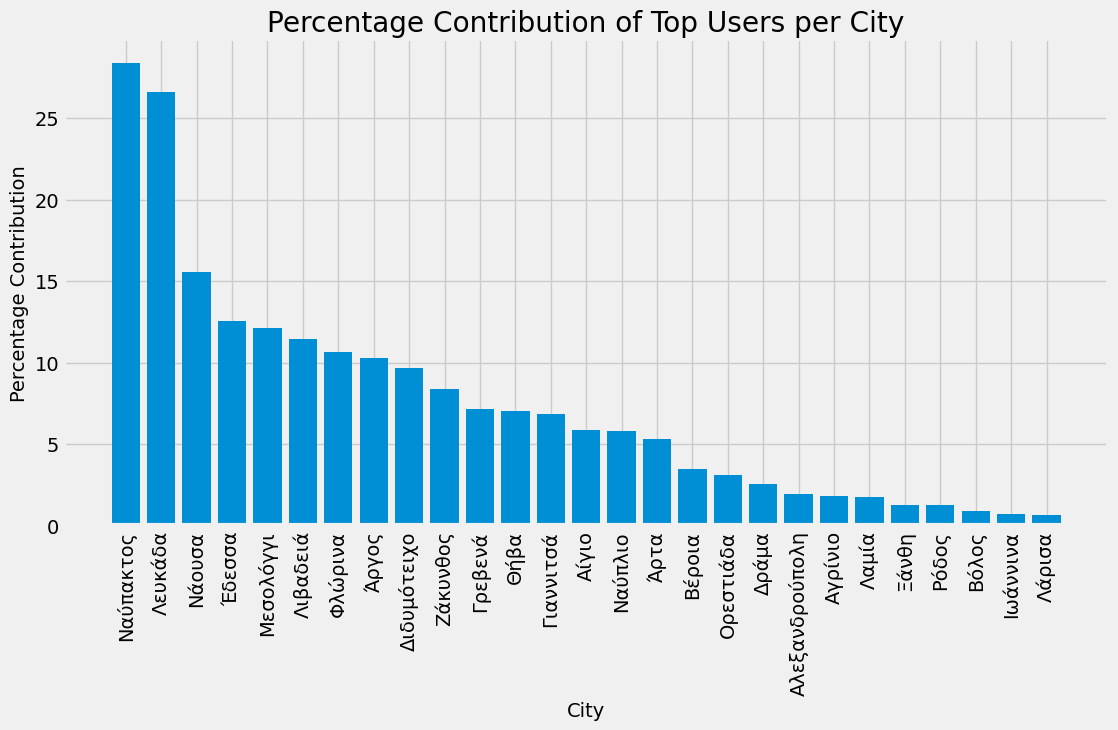

In [17]:

plt.figure(figsize=(12, 6))
plt.bar(city_percentage['city'], city_percentage['percentage'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Percentage Contribution')
plt.title('Percentage Contribution of Top Users per City')

plt.show()
None

##### RFM efood

In [14]:
df["order_timestamp"] = pd.to_datetime(df["order_timestamp"])

In [15]:
#Examine number of transactions per customer 

customer_counts = df["user_id"].value_counts().sort_values(ascending=False).reset_index()
customer_counts.columns = ['user_id', 'count']
customer_counts.head(10)

,user_id,count
0,154559060124,135
1,104460666828,107
2,119884693362,105
3,32214575190,100
4,247344644274,88
5,131345003580,87
6,88909070628,77
7,476333229792,74
8,117577441989,71
9,17562694464,71


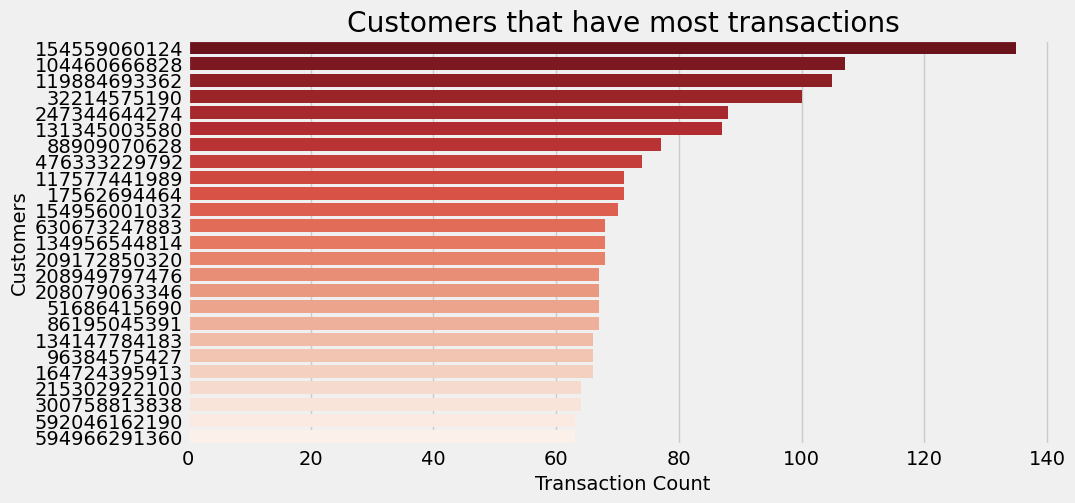

In [16]:
# Examine and Plot top25 customers

customer_counts_top25 = customer_counts.head(25)

fig, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data=customer_counts_top25,x = customer_counts_top25["count"],y = customer_counts_top25["user_id"],
            order = customer_counts_top25["user_id"],  orient = 'h', palette = "Reds_r")

plt.title("Customers that have most transactions")
plt.ylabel("Customers")
plt.xlabel("Transaction Count")

plt.show()

In [17]:
df["order_timestamp"].max()

Timestamp('2022-01-31 23:59:53+0000', tz='UTC')

In [18]:
df["order_timestamp"].min()

Timestamp('2022-01-01 00:06:07+0000', tz='UTC')

In [19]:
# Find Recency. Take as reference day the maximum date

df['Recency'] = (df['order_timestamp'].max() - df['order_timestamp']).dt.days
df.head()

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,Recency
0,7322173742136,94223136441,2022-01-18 15:41:28+00:00,Αίγιο,Breakfast,True,3.6,13
1,7210978616924,204794985423,2022-01-02 17:50:50+00:00,Αγρίνιο,Breakfast,True,1.9,29
2,7221232906132,12703920390,2022-01-04 08:37:12+00:00,Αγρίνιο,Breakfast,True,1.7,27
3,7399605199800,673310109528,2022-01-31 11:33:05+00:00,Λιβαδειά,Breakfast,True,3.0,0
4,7264221279744,673310109528,2022-01-10 11:18:28+00:00,Λιβαδειά,Breakfast,True,3.0,21


In [20]:
df['User_amount']= df.groupby('user_id')['amount'].transform('sum')
df.head()

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,Recency,User_amount
0,7322173742136,94223136441,2022-01-18 15:41:28+00:00,Αίγιο,Breakfast,True,3.6,13,103.6
1,7210978616924,204794985423,2022-01-02 17:50:50+00:00,Αγρίνιο,Breakfast,True,1.9,29,30.5
2,7221232906132,12703920390,2022-01-04 08:37:12+00:00,Αγρίνιο,Breakfast,True,1.7,27,35.7
3,7399605199800,673310109528,2022-01-31 11:33:05+00:00,Λιβαδειά,Breakfast,True,3.0,0,23.9
4,7264221279744,673310109528,2022-01-10 11:18:28+00:00,Λιβαδειά,Breakfast,True,3.0,21,23.9


In [22]:
rfm = df.groupby(["user_id"]).agg({'Recency': np.min,
                                      'order_timestamp': pd.Series.nunique,
                                     'User_amount': np.sum}).reset_index()


#Rename columns
rfm.rename(columns={'Recency':'Recency','order_timestamp':'Frequency','User_amount':'Monetary'},inplace= True)


rfm

,user_id,Recency,Frequency,Monetary
0,44118921,26,1,33.3
1,108938802,4,3,132.6
2,110361993,7,11,1507.0
3,138437670,3,1,5.5
4,144777339,0,14,851.2
...,...,...,...,...
121938,685557444369,0,1,6.8
121939,685561325799,0,1,8.7
121940,685561843323,0,1,7.2
121941,685566242277,0,1,11.5


In [23]:
# Create Scores RFM scores based on quantiles of distribution

#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
rfm["recency_score"] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])

#Total spend by the customer.The least money gets 1, the most money gets 4.
rfm["monetary_score"]= pd.qcut(rfm["Monetary"],4,labels=[1,2,3,4])

rfm.head()

,user_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,44118921,26,1,33.3,1,1,2
1,108938802,4,3,132.6,3,3,3
2,110361993,7,11,1507.0,3,4,4
3,138437670,3,1,5.5,3,1,1
4,144777339,0,14,851.2,4,4,4


In [24]:
rfm["user_id"].nunique()

121943

In [25]:
rfm["RFM_Segment"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str)

rfm['RFM_Score'] = rfm[['recency_score','frequency_score','monetary_score']].sum(axis=1)
rfm.head()

,user_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score
0,44118921,26,1,33.3,1,1,2,112,4
1,108938802,4,3,132.6,3,3,3,333,9
2,110361993,7,11,1507.0,3,4,4,344,11
3,138437670,3,1,5.5,3,1,1,311,5
4,144777339,0,14,851.2,4,4,4,444,12


In [26]:
rfm.tail()

,user_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score
121938,685557444369,0,1,6.8,4,2,1,421,7
121939,685561325799,0,1,8.7,4,2,1,421,7
121940,685561843323,0,1,7.2,4,2,1,421,7
121941,685566242277,0,1,11.5,4,2,1,421,7
121942,685567924230,0,1,7.0,4,2,1,421,7


In [27]:
# Use regex and dictionaries values to categorize numbers from customers

segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}
rfm['Segment_labels'] = rfm['RFM_Segment']
rfm['Segment_labels'] = rfm['Segment_labels'].replace(segt_map, regex=True)
rfm.head()

,user_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score,Segment_labels
0,44118921,26,1,33.3,1,1,2,112,4,Need Activation
1,108938802,4,3,132.6,3,3,3,333,9,High Promising
2,110361993,7,11,1507.0,3,4,4,344,11,VIP
3,138437670,3,1,5.5,3,1,1,311,5,Low Loyal
4,144777339,0,14,851.2,4,4,4,444,12,VIP


In [28]:
segements_grouped = rfm[["Segment_labels", "Recency","Frequency","Monetary"]].\
groupby("Segment_labels").agg(["mean","count","max"]).round().reset_index()


segements_grouped = rfm.groupby(["Segment_labels"]).agg({'Monetary': np.sum,
                                   "user_id": pd.Series.nunique,
                                    "Recency": np.mean,                     
                                     "Frequency": np.mean,
                                                        }).reset_index()

segements_grouped["Monetary%"] = segements_grouped["Monetary"]/segements_grouped["Monetary"].sum()*100
segements_grouped["Count%"] = segements_grouped["user_id"]/segements_grouped["user_id"].sum()*100

segements_grouped.rename(columns={'Monetary':'TotalMonetary','user_id':'TotalCustomers',
                                 'Recency':'MeanRecency','Frequency':'MeanFrequency',
                                 "Count%":"Customers%"},inplace= True)


segements_grouped = segements_grouped.sort_values(by=['Monetary%'], ascending=False)
segements_grouped

,Segment_labels,TotalMonetary,TotalCustomers,MeanRecency,MeanFrequency,Monetary%,Customers%
11,VIP,35924595.09,26729,1.714355,11.568708,83.615371,21.919257
2,High Promising,2236624.08,16541,2.624448,4.093404,5.205797,13.564534
9,Top Recent,1822042.74,3074,10.676968,7.545218,4.240849,2.520850
0,High Loyal,849741.91,6706,11.102595,3.772443,1.977795,5.499291
8,Need Activation,818819.24,29697,23.540324,1.493653,1.905822,24.353181
6,Medium New,472035.70,16194,7.238607,1.677103,1.098675,13.279975
10,Top at Risk,326120.69,681,20.662261,6.907489,0.759054,0.558458
1,High New,247745.65,3266,7.043172,1.993264,0.576634,2.678301
3,Low Loyal,95466.74,12207,9.555091,1.026870,0.222201,10.010415
7,Medium Potential,93996.48,2247,2.783267,2.911437,0.218779,1.842664


In [34]:
segements_grouped.to_csv('efood_segmentation.csv',index=True)

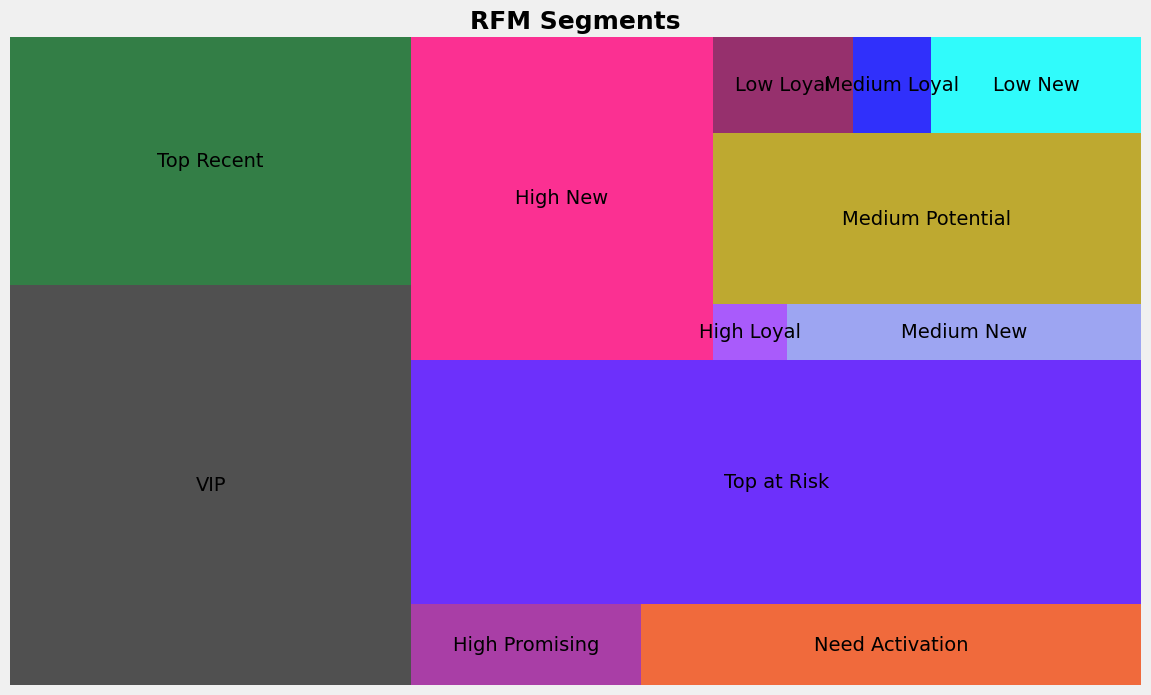

In [29]:
# Plot Segments in a Treemap

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 8)
sq.plot(sizes=segements_grouped["Customers%"], 
                      label=['VIP', 
                            "Top Recent", 
                            'High Promising', 
                            'Need Activation', 
                            'Top at Risk', 
                            'High New', 
                            'High Loyal',
                            'Medium New',
                            'Medium Potential',
                            'Low Loyal',
                            'Medium Loyal',
                            'Low New'], 
                            alpha=0.8, 
                            color=["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C", "blue", "cyan"])#"#A4E919"
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

#### RFM for Breakfast

In [30]:
df_breakfast=df[df['cuisine'] == 'Breakfast']
df_breakfast


,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,Recency,User_amount
0,7322173742136,94223136441,2022-01-18 15:41:28+00:00,Αίγιο,Breakfast,True,3.60,13,103.60
1,7210978616924,204794985423,2022-01-02 17:50:50+00:00,Αγρίνιο,Breakfast,True,1.90,29,30.50
2,7221232906132,12703920390,2022-01-04 08:37:12+00:00,Αγρίνιο,Breakfast,True,1.70,27,35.70
3,7399605199800,673310109528,2022-01-31 11:33:05+00:00,Λιβαδειά,Breakfast,True,3.00,0,23.90
4,7264221279744,673310109528,2022-01-10 11:18:28+00:00,Λιβαδειά,Breakfast,True,3.00,21,23.90
...,...,...,...,...,...,...,...,...,...
207958,7263840786692,169008847728,2022-01-10 10:07:51+00:00,Ρόδος,Breakfast,False,5.20,21,93.10
207959,7400785395384,204555630573,2022-01-31 14:43:05+00:00,Ρόδος,Breakfast,False,6.65,0,250.95
207960,7375063674700,311089886688,2022-01-27 17:16:07+00:00,Ρόδος,Breakfast,True,4.60,4,23.20
207961,7211036589604,210899698527,2022-01-02 17:59:55+00:00,Λέρος,Breakfast,False,2.00,29,4.00


In [31]:
rfm = df_breakfast.groupby(["user_id"]).agg({'Recency': np.min,
                                      'order_timestamp': pd.Series.nunique,
                                     'User_amount': np.sum}).reset_index()


#Rename columns
rfm.rename(columns={'Recency':'Recency','order_timestamp':'Frequency','User_amount':'Monetary'},inplace= True)


rfm

,user_id,Recency,Frequency,Monetary
0,110361993,23,1,137.00
1,144777339,0,14,851.20
2,145424244,9,1,162.75
3,153963390,3,1,36.50
4,155515962,23,1,5.50
...,...,...,...,...
55829,685517465640,0,1,2.00
55830,685519276974,0,1,5.40
55831,685526134167,0,1,6.10
55832,685538295981,0,1,7.50


In [32]:
# Create Scores RFM scores based on quantiles of distribution

#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
rfm["recency_score"] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])

#Total spend by the customer.The least money gets 1, the most money gets 4.
rfm["monetary_score"]= pd.qcut(rfm["Monetary"],4,labels=[1,2,3,4])

rfm.head()

,user_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,110361993,23,1,137.00,1,1,3
1,144777339,0,14,851.20,4,4,4
2,145424244,9,1,162.75,2,1,3
3,153963390,3,1,36.50,3,1,2
4,155515962,23,1,5.50,1,1,1


In [33]:
rfm["RFM_Segment"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str)

rfm['RFM_Score'] = rfm[['recency_score','frequency_score','monetary_score']].sum(axis=1)
rfm.head()

,user_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score
0,110361993,23,1,137.00,1,1,3,113,5
1,144777339,0,14,851.20,4,4,4,444,12
2,145424244,9,1,162.75,2,1,3,213,6
3,153963390,3,1,36.50,3,1,2,312,6
4,155515962,23,1,5.50,1,1,1,111,3


In [34]:
# Use regex and dictionaries values to categorize numbers from customers
# 

segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}
rfm['Segment_labels'] = rfm['RFM_Segment']
rfm['Segment_labels'] = rfm['Segment_labels'].replace(segt_map, regex=True)
rfm.head()

,user_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score,Segment_labels
0,110361993,23,1,137.00,1,1,3,113,5,Need Activation
1,144777339,0,14,851.20,4,4,4,444,12,VIP
2,145424244,9,1,162.75,2,1,3,213,6,High New
3,153963390,3,1,36.50,3,1,2,312,6,Medium New
4,155515962,23,1,5.50,1,1,1,111,3,Need Activation


In [35]:
bsegments_grouped = rfm[["Segment_labels", "Recency","Frequency","Monetary"]].\
groupby("Segment_labels").agg(["mean","count","max"]).round().reset_index()


bsegments_grouped = rfm.groupby(["Segment_labels"]).agg({'Monetary': np.sum,
                                   "user_id": pd.Series.nunique,
                                    "Recency": np.mean,                     
                                     "Frequency": np.mean,
                                                        }).reset_index()

bsegments_grouped["Monetary%"] = bsegments_grouped["Monetary"]/bsegments_grouped["Monetary"].sum()*100
bsegments_grouped["Count%"] = bsegments_grouped["user_id"]/bsegments_grouped["user_id"].sum()*100

bsegments_grouped.rename(columns={'Monetary':'TotalMonetary','user_id':'TotalCustomers',
                                 'Recency':'MeanRecency','Frequency':'MeanFrequency',
                                 "Count%":"Customers%"},inplace= True)


bsegments_grouped = bsegments_grouped.sort_values(by=['Monetary%'], ascending=False)
bsegments_grouped

,Segment_labels,TotalMonetary,TotalCustomers,MeanRecency,MeanFrequency,Monetary%,Customers%
11,VIP,14670918.12,11425,2.090328,10.281225,80.077135,20.462442
9,Top Recent,1127291.22,2082,12.160423,5.524496,6.153006,3.728911
2,High Promising,775703.39,5760,3.093576,3.719271,4.233962,10.316295
8,Need Activation,485119.26,12831,25.265451,1.400592,2.647889,22.980621
1,High New,338787.58,3243,8.456059,1.493679,1.849178,5.808289
0,High Loyal,315639.25,2442,13.130631,3.271499,1.722829,4.373679
6,Medium New,228072.10,6333,8.828201,1.203379,1.244868,11.342551
10,Top at Risk,178808.60,448,23.178571,4.450893,0.975977,0.802378
7,Medium Potential,74488.14,1821,3.343767,2.602416,0.406573,3.261454
3,Low Loyal,59468.93,6557,10.889889,1.121092,0.324595,11.743740


In [41]:
bsegments_grouped.to_csv('breakfast_segmentation.csv',index=True)

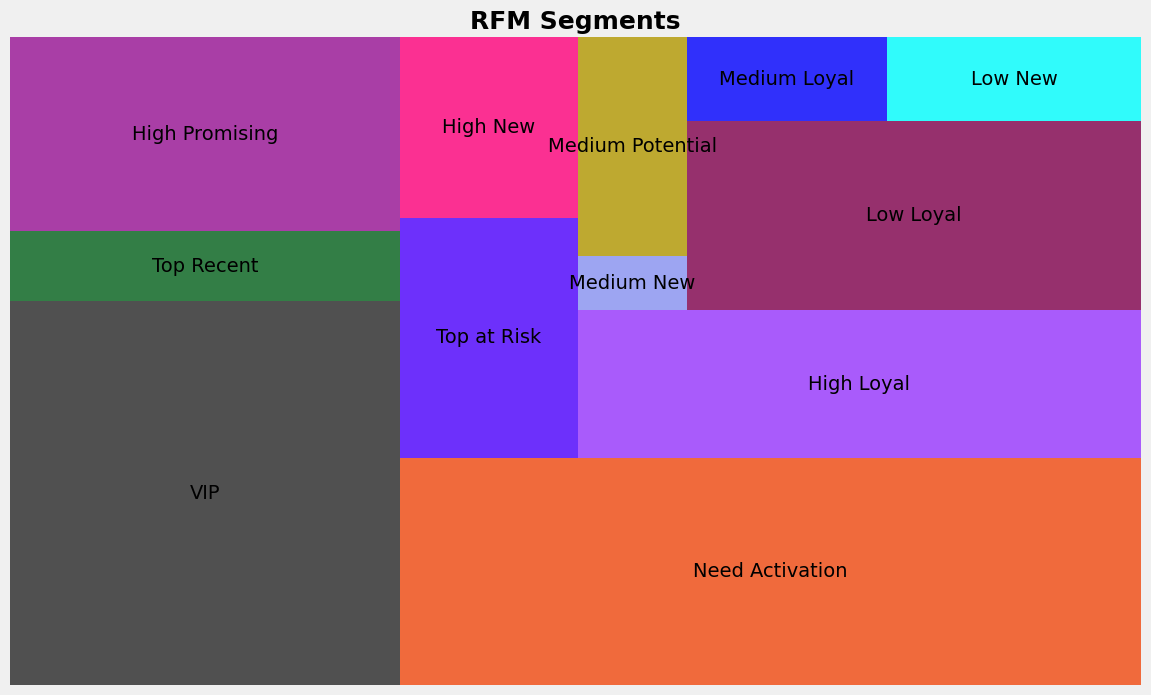

In [36]:
# Plot Segments in a Treemap

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 8)
sq.plot(sizes=bsegments_grouped["Customers%"], 
                      label=['VIP', 
                            "Top Recent", 
                            'High Promising', 
                            'Need Activation', 
                            'Top at Risk', 
                            'High New', 
                            'High Loyal',
                            'Medium New',
                            'Medium Potential',
                            'Low Loyal',
                            'Medium Loyal',
                            'Low New'], 
                            alpha=0.8, 
                            color=["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C", "blue", "cyan"])#"#A4E919"
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

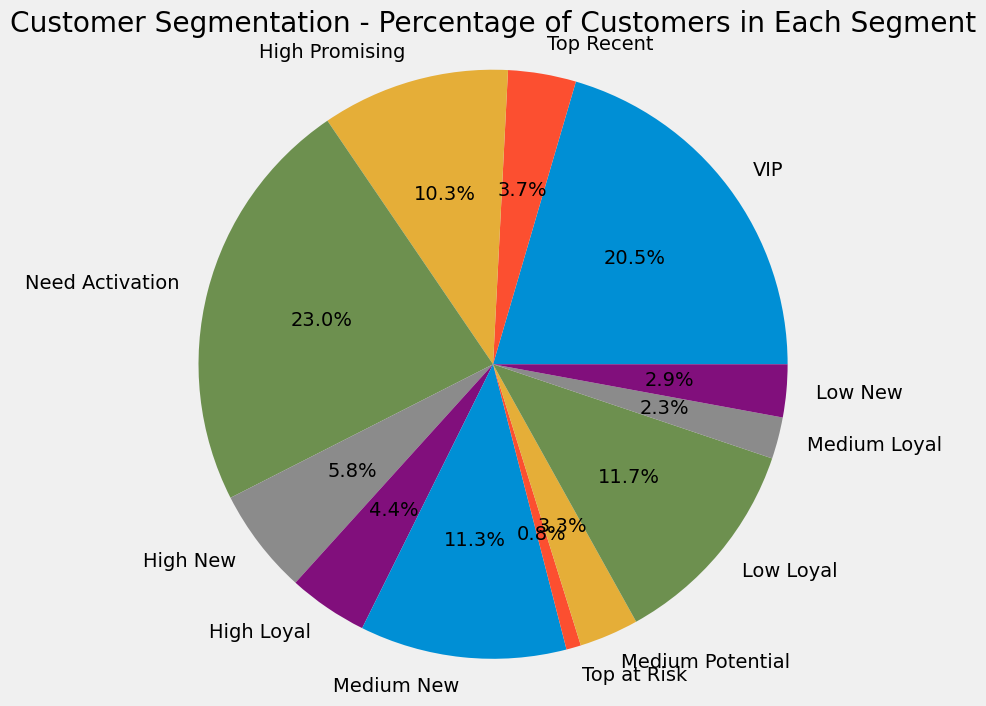

In [38]:
# Pie Chart: Percentage of Customers in Each Segment
plt.figure(figsize=(8, 8))
plt.pie(bsegments_grouped['Customers%'], labels=bsegments_grouped['Segment_labels'], autopct='%1.1f%%')
plt.title('Customer Segmentation - Percentage of Customers in Each Segment')
plt.axis('equal')
plt.show()


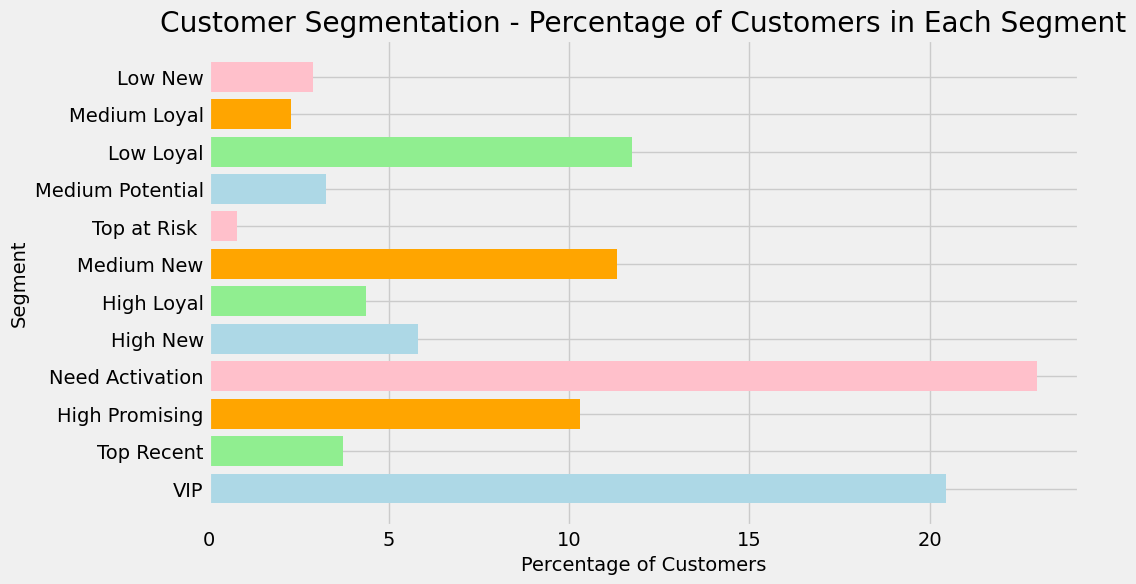

In [39]:
# Stacked Bar Chart: Percentage of Customers in Each Segment
plt.figure(figsize=(10, 6))
segments = bsegments_grouped['Segment_labels']
customers_percentage = bsegments_grouped['Customers%']

# Define colors for each segment
colors = ['lightblue', 'lightgreen', 'orange', 'pink']

# Create the stacked bar chart
plt.barh(segments, customers_percentage, color=colors)
plt.xlabel('Percentage of Customers')
plt.ylabel('Segment')
plt.title('Customer Segmentation - Percentage of Customers in Each Segment')

plt.show()